<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/04_11_%E7%94%BB%E5%83%8F%E3%83%87%E3%83%BC%E3%82%BF%E6%8B%A1%E5%BC%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像データ拡張

In [9]:
import pandas as pd
import urllib.request 
import numpy as np
from PIL import Image #画像を扱うモジュールはいくつかありますが最も基本的なpython image library(PIL)を例にあげます
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [38]:
url = "https://pics.prcm.jp/2a5171d4100ea/82208445/jpeg/82208445.jpeg" #画像データ(フリー素材確認済)
urllib.request.urlretrieve(url, 'miraitowa.jpg') # miraitowaという名前で google colabのドライブに保存します


('miraitowa.jpg', <http.client.HTTPMessage at 0x7f459ce58c10>)

In [39]:

imgorg= Image.open("miraitowa.jpg")  # PIL(Python Image Library)で読みこみます

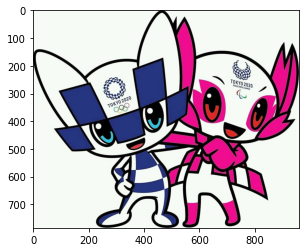

In [40]:
img =np.array(imgorg)
plt.imshow(img)

In [41]:
def makedata(img, datagen):
  # ミニバッチを生成する Python ジェネレーターを作成する。
  x = img[np.newaxis]  #  (Height, Width, Channels)  -> (1, Height, Width, Channels) 
  gen = datagen.flow(x, batch_size=1)  # 1枚しかないので、ミニバッチ数は1

  # Python ジェネレーターで9枚生成して、表示する。
  plt.figure(figsize=(10, 8))
  for i in range(9):
      batches = next(gen)  # (NumBatches, Height, Width, Channels) の4次元データを返す。
      # 画像として表示するため、3次元データにし、float から uint8 にキャストする。
      gen_img = batches[0].astype(np.uint8)

      plt.subplot(3, 3, i + 1)
      plt.imshow(gen_img)
      plt.axis('off')
  plt.show()

## 回転

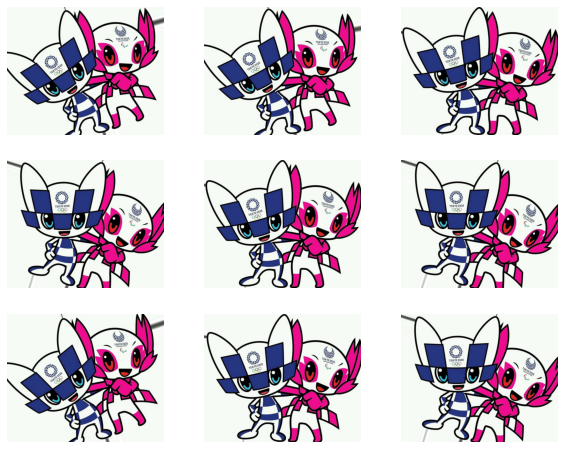

In [42]:
datagen = image.ImageDataGenerator(rotation_range=20)
makedata(img, datagen)

## 上下反転

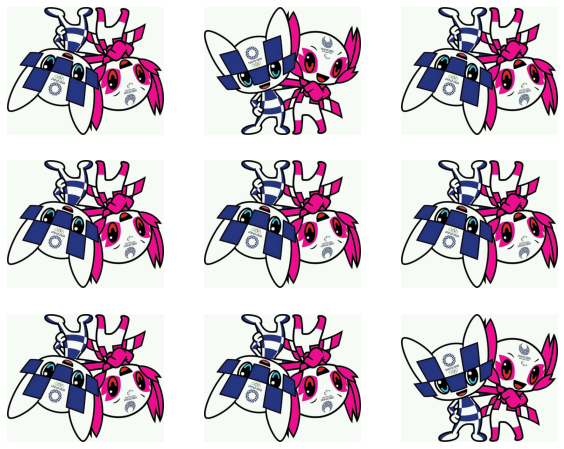

In [43]:
datagen =  image.ImageDataGenerator(vertical_flip=True) 
makedata(img, datagen)

## 左右反転

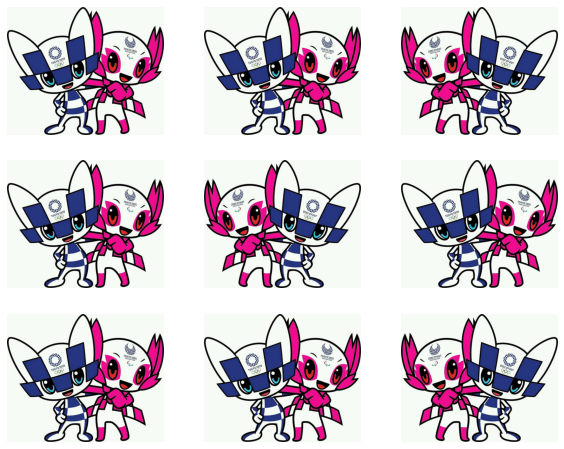

In [44]:
datagen =  image.ImageDataGenerator(horizontal_flip=True)
makedata(img, datagen)

## 上下平行移動

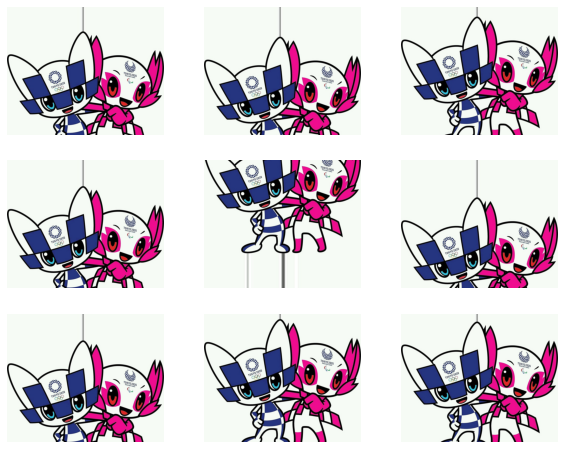

In [45]:
datagen =  image.ImageDataGenerator(height_shift_range=0.3)
makedata(img, datagen)

## 左右平行移動

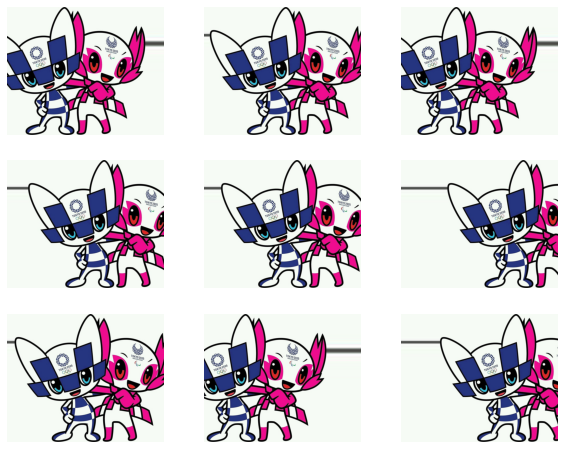

In [46]:
datagen =  image.ImageDataGenerator(width_shift_range=0.3)
makedata(img, datagen)

## せん断（スキュー　平行四辺形の変形）

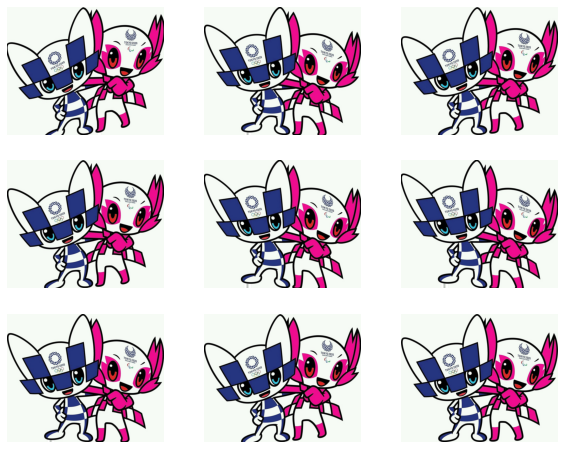

In [54]:
datagen = image.ImageDataGenerator(shear_range=10)
makedata(img, datagen)

## 縦横拡大・縮小

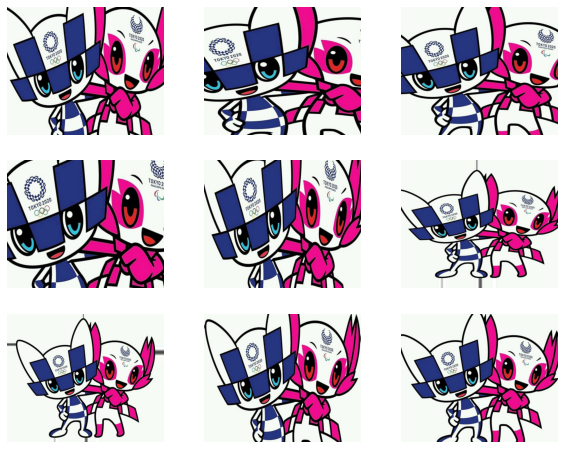

In [48]:
datagen = image.ImageDataGenerator(zoom_range=[0.5, 1.2])
makedata(img, datagen)

## チャネルシフト（明るさを均等に加算，減算）

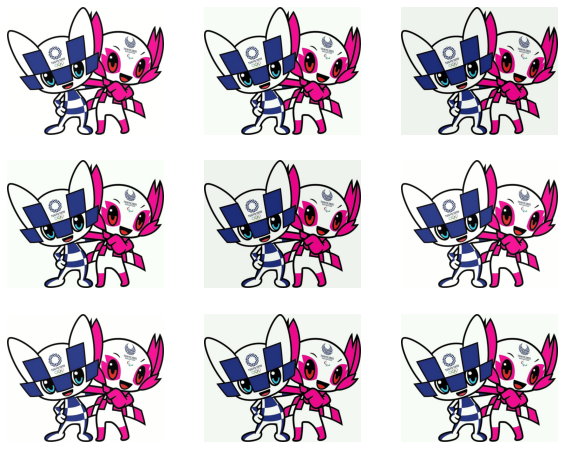

In [55]:
datagen = image.ImageDataGenerator(channel_shift_range=10.)
makedata(img, datagen)

## 明度変化　（チャネルへの掛け算）

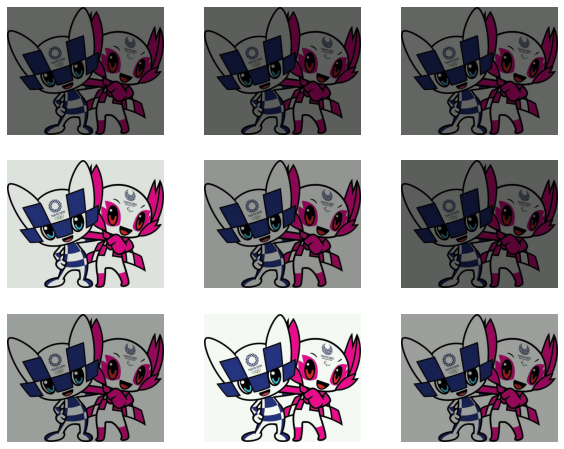

In [50]:
datagen = image.ImageDataGenerator(brightness_range=[0.3, 1.0])
makedata(img, datagen)

## 標準化（0～1になるので真っ暗に見える）

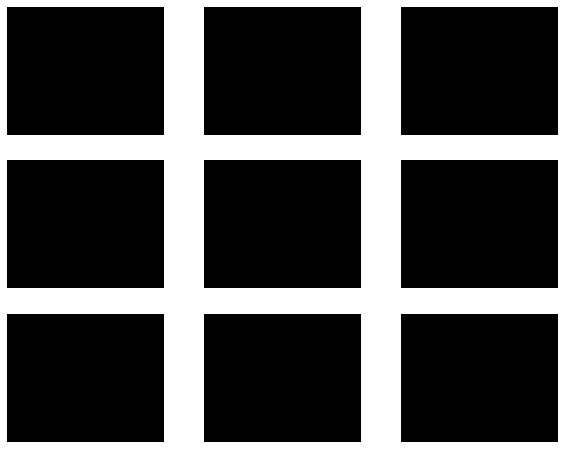

In [51]:
datagen = image.ImageDataGenerator(rescale=1. / 255)
makedata(img, datagen)

## 画素値平均を0にする

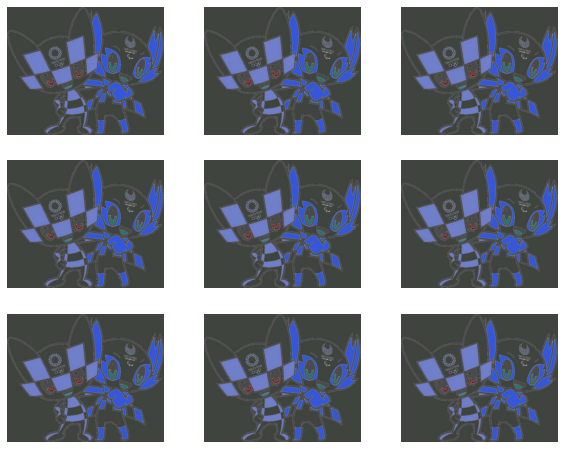

In [52]:
datagen = image.ImageDataGenerator(samplewise_center=True)
makedata(img, datagen)

## 画素値分散を１にする

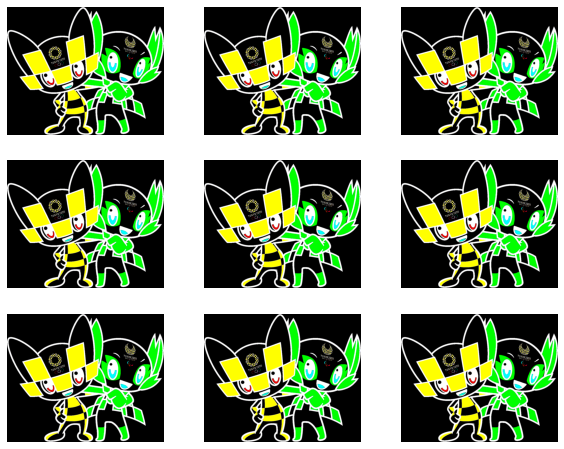

In [53]:
datagen = image.ImageDataGenerator(
    samplewise_center=True, samplewise_std_normalization=True)
makedata(img, datagen)